In [1]:
using LinearAlgebra
using PyPlot
using Random
using Statistics
using Printf
using JLD2, FileIO
using ProgressMeter
include("HyperRPNNs.jl")
include("HyperECNNs.jl")
rng = MersenneTwister(0);

In [2]:
MarkerList = ["o","s","v","^",">","<"];
LineStyleList = ["solid","dashed","solid","dashed","solid","dashed"];

In [3]:
function noise2(x,noise_std = 0.1)
    
    v = 1 .- 2*(1*(rand(rng,Float64,size(x)) .< noise_std));
    xr = v .* x
    
    return xr
end

noise2 (generic function with 2 methods)

In [4]:
function plotseq(Sequence,i)
    ### Convergence Ratio ###
    
    num_elements = size(Sequence)
    
    #print(size(Sequence[1]))
    
    Convergence_rate = zeros(num_elements[1]-1,1)
    
    for j=1:num_elements[1]-1
       Convergence_rate[j] = norm(Sequence[j+1]-Sequence[j])/norm(Sequence[j+1])
    end
    
    c1 = 0
    k = i
    if k>6
        c1 = c1+1
        k = c1
    end
    
    c2 = 0
    v = i
    if v>6
        c2 = c2+1
        v = c2
    end 
    
    return k,v,Convergence_rate,num_elements
end

plotseq (generic function with 1 method)

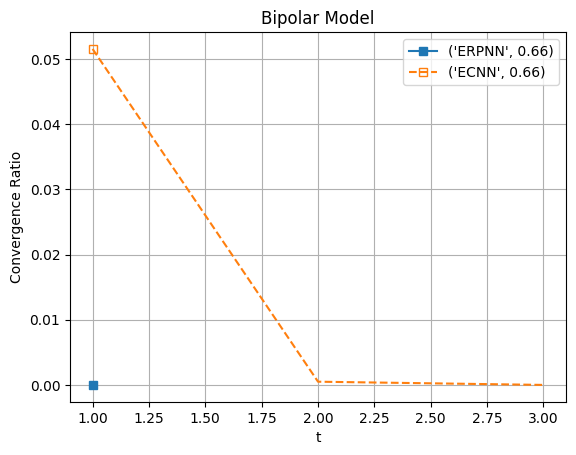

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [11]:
N = 100
P = 160

alpha = 1
beta = -1


U = 2*rand(rng,Bool,(N,1,P)).-1;
U2 = reshape(U,(N,P))

@showprogress for i=2:2
#i = 7
    
    x_real = reshape(U[:,:,1],(N,1));
    xr     = noise2(x_real,0.33*i)

    y, Sequence = HyperRPNNs.UnitQ_Sync(U,xr,alpha,beta,5)
    y2, Sequence2 = HyperECNNs.UnitQ_Sync(U2,xr,alpha/N,beta,5)
    
    k,v,Convergence_rate,num_elements = plotseq(Sequence,i)
    
    k,v,Convergence_rate2,num_elements2 = plotseq(Sequence2,i)
    
    noise = 0.33*i;
    
    plot(collect(1:num_elements[1]-1),Convergence_rate, linestyle = LineStyleList[1], marker = MarkerList[k], label = ("ERPNN",noise))
    plot(collect(1:num_elements2[1]-1),Convergence_rate2, linestyle = LineStyleList[2], marker = MarkerList[k], markevery=50,  mfc="none",  label = ("ECNN",noise))
end
xlabel("t")
ylabel("Convergence Ratio")
title("Bipolar Model")
legend()
grid()
savefig("Figures/Conv_rate_BipolarRPNN.eps")
savefig("Figures/Conv_rate_BipolarRPNN.pdf")